Names and PRN for all group members:
- Name:              |PRN: 
- Ameya Bhawsar      |240340128003
- Jawade Shrinivas   |240340128010
- Kunal Kurve        |240340128012
- Manasi Malge       |240340128013
- Pranav Gaddi       |240340128019

# Image Processing with Neural Network
## A07: Group Assignment


##  Convolutional Neural Network (CNN)

- Flowers Dataset


## Import statements

In [ ]:
###-----------------
### Import Libraries
###-----------------

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf



## Helper function

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# By Pramod Sharma : pramod.sharma@prasami.com

###-----------------
### Import Libraries
###-----------------

import os
import datetime
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# verify if the directory exists
def fn_dir_exists(_dir):
    '''
    Args:
    	_dir: path if a directory
     '''

    res = os.path.exists(_dir)

    fn_log_event ('-- Directory "{}" exist : {}'.format(_dir, res), 'debug')

    if not res:

        fn_log_event ('-- Directory "{}" does not exists.'.format(_dir), 'debug')

        sys.exit('-- Directory "{}" does not exists.'.format(_dir))

    return res



def fn_file_exists(_file):
    '''
        verify if the file exists
    '''
    res = os.path.exists(_file)

    fn_log_event ('-- File "{}" exist : {}'.format(_file, res), 'debug')

    if not res:

        fn_log_event ('-- File "{}" does not exists.'.format(_file), 'debug')

        sys.exit('-- File "{}" does not exists.'.format(_file))

    return res


###-----------------------------
### Verify or create a directory
###-----------------------------
def fn_verify_dir(_path : str):
    '''
    Arg:
        path: path to verify the directory
    returns:
        create dir if it does not exists
    '''
    if os.path.exists(_path): # check if the path exists. Maybe a file or a folder

        print(_path, ' exists') # advised the user

    else:

        os.makedirs(_path) # create the path

        print("Created folder : ", _path)

###------------------------------------------------
### Plot Loss Curve using Tensorflow history object
###------------------------------------------------
def fn_plot_tf_hist(hist_df):

    '''
    Args:
        hist_df: a dataframe with following ccolumns
            column 0: loss
            column 1: accuracy
            column 2: val_loss
            column 3: val_accuracy
            While plotting columns are accessed by index
            so that even if the column names are different it will not throw exceptions.
    '''

    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
    facecolor = 'cyan'
    fontsize=12
    CMAP = plt.cm.coolwarm

    # Get columns by index to eliminate any column naming error
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[1]
    y3 = hist_df.columns[2]
    y4 = hist_df.columns[3]

    # Where was min loss
    best = hist_df[hist_df[y3] == hist_df[y3].min()]

    ax = axes[0]

    hist_df.plot(y = [y1,y3], ax = ax, colormap=CMAP)


    # little beautification
    txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y3]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y3].min())
    y_max = max(hist_df[y1].max(), hist_df[y3].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y3].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y3].to_numpy()[0] + offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y1.capitalize())
    ax.set_title('Errors')
    ax.grid();
    ax.legend(loc = 'upper left') # model legend to upper left

    ax = axes[1]

    hist_df.plot( y = [y2, y4], ax = ax, colormap=CMAP)

    # little beautification
    txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y2],
                           hist_df.iloc[-1][y4]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y2].min(), hist_df[y4].min())
    y_max = max(hist_df[y2].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y4].to_numpy()[0]-offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow


    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y2.capitalize())
    ax.grid()
    ax.legend(loc = 'lower left')

    plt.tight_layout()



###------------------------------
### Plot Loss Curve using pytorch
###------------------------------
def fn_plot_torch_hist(hist_df):

    # instantiate figure
    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='cyan', alpha=0.5)

    # columns
    x = hist_df.columns[0]
    y1 = hist_df.columns[1]
    y2 = hist_df.columns[2]
    y3 = hist_df.columns[3]
    y4 = hist_df.columns[4]

    # Where was min loss
    best = hist_df[hist_df[y2] == hist_df[y2].min()]
    best = best.drop_duplicates(subset=y2)
    # pick first axis
    ax = axes[0]

    # Plot all losses
    hist_df.plot(x = x, y = [y1, y2], ax = ax)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y2].min())
    y_max = max(hist_df[y1].max(), hist_df[y2].max())
    offset = (y_max-y_min)/10.0

    # little beautification
    txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y2]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y2].to_numpy()[0]:6.4f}', # text to print
                xy=(best[x].to_numpy(), best[y2].to_numpy()[0]), # Arrow start
                xytext=(best[x].to_numpy()+ offset, best[y2].to_numpy()[0]+offset), # location of text
                fontsize=14,va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor='cyan', shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best[x].to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel(x.title())
    ax.set_ylabel(y1.title())
    ax.set_title('Errors')
    ax.grid()
    ax.legend(loc = 'upper left') # model legend to upper left

    # pick second axis
    ax = axes[1]

    # Plot accuracies
    hist_df.plot(x = x, y = [y3, y4], ax = ax)

    # little beautification
    txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y3],
                           hist_df.iloc[-1][y4]) #text to plot

    # calculate offset for arroe
    y_min = min(hist_df[y3].min(), hist_df[y4].min())
    y_max = max(hist_df[y3].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # place a text box in lower middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best[x].to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best[x].to_numpy()- offset, best[y4].to_numpy()[0]-offset), # location of text
                fontsize=14,va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor='cyan', shrink=0.05)) # arrow


    # Draw a vertical line at best value
    ax.axvline(x = best[x].to_numpy(),
               color = 'green',
               linestyle='-.', lw = 3)

    # Labels
    ax.set_xlabel(x.title())
    ax.set_ylabel(y3.title())
    ax.set_title('Accuracies')
    ax.grid();
    ax.legend(loc = 'lower left')

    plt.tight_layout()



###---------------------------------------------------
### Plot count of classes in training and testing sets
###---------------------------------------------------
def fn_plot_labels(tr_ds, ts_ds, class_names = None):

    '''
        Args:
            tr_ds :  Training Dataset
            ts_ds : Testing dataset
        Returns : none
    '''

    # create figure and axes
    fig, axes = plt.subplots(1,2, figsize = (15,5))

    # get names of the classes
    if not class_names:
        tr_class_names = tr_ds.class_names
        ts_class_names = tr_ds.class_names

    # pick first axis
    ax = axes[0]

    # create dict of training labels
    class_counts = {}
    for imgs, lbls in tr_ds:
        for lbl in lbls.numpy():
            class_counts[lbl] = class_counts.get(lbl, 0) +1

    # bar plot
    ax.bar(tr_class_names, [class_counts.get(i, 0) for i in range(len(tr_class_names))],
           align='center',color = 'DarkBlue', alpha = 0.7)

    # add title
    ax.set_title('Training Set')

    # grids make it look good
    ax.grid()


    #pick second image
    ax = axes[1]

    # create dict of training labels
    class_counts = {}
    for imgs, lbls in ts_ds:
        for lbl in lbls.numpy():
            class_counts[lbl] = class_counts.get(lbl, 0) +1

    # bar plot
    ax.bar(ts_class_names, [class_counts.get(i, 0) for i in range(len(ts_class_names))],
           align='center',color = 'orange', alpha = 0.7)

    # add title
    ax.set_title('Test Set')


    # grids make it look good
    ax.grid()

    # fit the subplot(s) in to the figure area
    plt.tight_layout()

    # display all open figures
    plt.show()

def fn_convert_timestamp(tstr):
    '''
        Function to conver string of form "2015-11-12 1444"
    '''

    return datetime.strptime(tstr, "%Y-%m-%d_%H%M")

###----------------------
### Plot confusion matrix
###----------------------
def fn_plot_confusion_matrix(y_true, y_pred, labels):
    '''
    Args:
        y_true: Ground Truth
        y_pred : Predictions
        labels : dictonary
                  {0: 'Goal Keeper',
                  1: 'Defender',
                  2: 'Mid-Fielder',
                  3: 'Forward'}

    '''

    cm  = confusion_matrix(y_true, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels.values())

    fig, ax = plt.subplots(figsize = (6,6))

    disp.plot(ax = ax, cmap = 'Blues', xticks_rotation = 'vertical', colorbar=False)
    # Disable the grid
    ax.grid(False)

    plt.show();


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Some basic parameters

In [ ]:
###----------------------
### Some basic parameters
###----------------------


inpDir = '../../../input' # location where input data is stored
outDir = '../output' # location to store outputs
modelDir = '../models'
subDir = 'flower_photos'
altName = 'cnn_base'

RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production
tf.random.set_seed(RANDOM_STATE) # setting for Tensorflow as well

TEST_SIZE = 0.2

ALPHA = 0.001
EPOCHS = 70 # number of cycles to run
PATIENCE = 20
LR_PATIENCE = 10
FACTOR_LR = 0.1
BATCH_SIZE = 32 # inline of Training Rows being 60000
IMG_HEIGHT = 190 #?????
IMG_WIDTH = 190 #????


# Set parameters for decoration of plots
params = {'legend.fontsize' : 'medium',
          'figure.figsize'  : (15,10),
          'axes.labelsize'  : 'medium',
          'axes.titlesize'  :'large',
          'xtick.labelsize' :'medium',
          'ytick.labelsize' :'medium',
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params) # update rcParams

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## Basic Hygiene

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')

if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
print (physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
def fn_plot_label(tr_ds, ts_ds):

    plt.figure(figsize = (15,5)) # instantiate the figure

    plt.subplot(1,2,1) # first out of 2

    train_labels = tf.concat([lbl for img, lbl in tr_ds], axis = 0).numpy() # get the labels

    unique, _, counts = tf.unique_with_counts(train_labels) # get counts

    plt.bar(range(len(unique)), counts, align='center', color = 'DarkBlue') # barplot the counts

    plt.xticks(range(len(unique)), class_names)

    plt.title('Training Set')

    plt.subplot(1,2,2)

    test_labels = tf.concat([lbl for img, lbl in ts_ds], axis = 0).numpy()

    unique, _, counts = tf.unique_with_counts(test_labels)

    plt.bar(range(len(unique)), counts, align='center', color = 'Orange')

    plt.xticks(range(len(unique)), class_names)

    plt.title('Test Set')


## loading data set

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)


# data_dir = os.path.join(inpDir, subDir)
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
os.listdir(data_dir)

['dandelion', 'LICENSE.txt', 'sunflowers', 'roses', 'daisy', 'tulips']

## Creating trainig and testing data

In [ ]:
# create training data
train_ds =tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, # path the the data directory
    validation_split=TEST_SIZE, # what ratio of validation data
    subset='training', # purpose
    seed=RANDOM_STATE,
    image_size=[IMG_HEIGHT, IMG_WIDTH], ## @@@ WHAT!
    batch_size=BATCH_SIZE
)
# test data
test_ds =tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, # path the the data directory
    validation_split=TEST_SIZE, # what ratio of validation data
    subset='validation', # purpose
    seed=RANDOM_STATE,
    image_size=[IMG_HEIGHT, IMG_WIDTH], ## @@@ WHAT!
    batch_size=BATCH_SIZE
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
# is it picking class names
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
class_dict = {k: v for k, v in enumerate(class_names)}
class_dict

{0: 'daisy', 1: 'dandelion', 2: 'roses', 3: 'sunflowers', 4: 'tulips'}

In [ ]:
num_classes = len(class_names)
num_classes

5

In [ ]:
train_ds = train_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)
input_shape

(190, 190, 3)

## Building the model

In [ ]:
def build_model(input_shape, num_classes):
  l1_lambda = 0.004
  l2_lambda = 0.005

  dor1=0.1
  dor2=0.1
  dor3=0.2
  dor4=0.3
  dor5=0.35
  dor6=0.4

  knl_reg = tf.keras.regularizers.L1L2(l1 = l1_lambda, l2 = l2_lambda)

  knl_init = tf.keras.initializers.GlorotUniform(seed = RANDOM_STATE)

  tf.keras.layers.RandomFlip(mode='horizontal_and_vertical')

  model= tf.keras.Sequential()

    #Preprocessing

  model.add(tf.keras.layers.Rescaling(1./255.))
# -------------------------------------------------------------------------------
    #conv 1
  model.add(tf.keras.layers.Conv2D(32,(3,3),
        kernel_initializer = knl_init))  #28 * 28 * 32 ouyput expecting

  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.ReLU())
    #Pool 1
  model.add(tf.keras.layers.MaxPool2D(2, 2)) #94*94*32 output expected
  model.add(tf.keras.layers.Dropout(dor1))

# -------------------------------------------------------------------------------

    #conv 2
  model.add(tf.keras.layers.Conv2D(64,(3,3), kernel_initializer = knl_init))  #28 * 28 * 32 ouyput expecting

    #Pool 2
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.ReLU())

  model.add(tf.keras.layers.MaxPool2D(2, 2)) #94*94*32 output expected
  model.add(tf.keras.layers.Dropout(dor2))

#-------------------------------------------------------------------------------

    #conv 3
  model.add(tf.keras.layers.Conv2D(128,(3,3), kernel_initializer = knl_init))  #28 * 28 * 32 ouyput expecting

    #Pool 3
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.ReLU())

  model.add(tf.keras.layers.MaxPool2D(2, 2)) #94*94*32 output expected
  model.add(tf.keras.layers.Dropout(dor3))
#-------------------------------------------------------------------------------

    #conv 4
  model.add(tf.keras.layers.Conv2D(256,(3,3), kernel_initializer = knl_init))  #20 * 20 * 256 ouyput expecting

    #Pool 4
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.ReLU())

  model.add(tf.keras.layers.MaxPool2D(2, 2)) #10*10*256 output expected
  model.add(tf.keras.layers.Dropout(dor4))
#-------------------------------------------------------------------------------

    #conv 5
  model.add(tf.keras.layers.Conv2D(512,(3,3),kernel_initializer = knl_init))  #8 * 8 * 512 ouyput expecting

    #Pool 5
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.ReLU())

  model.add(tf.keras.layers.MaxPool2D(2, 2)) #4*4*512 output expected
  model.add(tf.keras.layers.Dropout(dor5))
#-------------------------------------------------------------------------------

    #conv 6
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.ReLU())
  model.add(tf.keras.layers.Conv2D(1024,(3,3),kernel_initializer = knl_init))  #2 * 2 * 1024 ouyput expecting



#-------------------------------------------------------------------------------

    # Head

  model.add(tf.keras.layers.Flatten())

    #Dense 1
  model.add(tf.keras.layers.Dense(512 ,activation='relu',kernel_regularizer = knl_reg))
  model.add(tf.keras.layers.Dropout(dor6))


    #Dense 2
  model.add(tf.keras.layers.Dense(64 ,activation='relu', kernel_regularizer = knl_reg))

    #Dense 3
  model.add(tf.keras.layers.Dense(num_classes))

  return model

In [ ]:
model=build_model(input_shape,num_classes)
model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=ALPHA),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics =['accuracy'])


In [ ]:
checkpoint_path = os.path.join('.', 'models', 'flowers_tf')
log_dir = os.path.join('.','logs', 'fit')

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='auto')

es_callback = tf.keras.callbacks.EarlyStopping(  #early stopping call back, after some time if
    monitor='val_loss',                       #there is no change in loss then assume it is only
    patience=PATIENCE,                         #your good weights
    verbose=1,
    mode='auto',
    restore_best_weights=True  )

lr_callback = tf.keras.callbacks.ReduceLROnPlateau( #learning rate call back
    monitor='val_loss',                          #used for decreasisng learning rate,when loss
    factor=FACTOR_LR, #learing factor multiplying                          #is not improving.
    patience=LR_PATIENCE,
    verbose=1)        #for stopping the learning rate updation


In [ ]:
history = model.fit(train_ds,
                    validation_data=test_ds,
                    batch_size=BATCH_SIZE,
                    callbacks = [model_checkpoint, es_callback , lr_callback],
                    epochs=EPOCHS)

Epoch 1/70
92/92 [==============================] - ETA: 0s - loss: 66.9688 - accuracy: 0.2459
Epoch 1: val_loss improved from inf to 18.50220, saving model to ./models/flowers_tf
92/92 [==============================] - 20s 143ms/step - loss: 66.9688 - accuracy: 0.2459 - val_loss: 18.5022 - val_accuracy: 0.2343 - lr: 0.0010
Epoch 2/70
92/92 [==============================] - ETA: 0s - loss: 10.0653 - accuracy: 0.4046
Epoch 2: val_loss improved from 18.50220 to 6.56407, saving model to ./models/flowers_tf
92/92 [==============================] - 10s 111ms/step - loss: 10.0653 - accuracy: 0.4046 - val_loss: 6.5641 - val_accuracy: 0.2493 - lr: 0.0010
Epoch 3/70
92/92 [==============================] - ETA: 0s - loss: 5.2952 - accuracy: 0.5082
Epoch 3: val_loss improved from 6.56407 to 5.03500, saving model to ./models/flowers_tf
92/92 [==============================] - 10s 114ms/step - loss: 5.2952 - accuracy: 0.5082 - val_loss: 5.0350 - val_accuracy: 0.2575 - lr: 0.0010
Epoch 4/70
92/92

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 190, 190, 3)       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 188, 188, 32)      896       
                                                                 
 batch_normalization_22 (Ba  (None, 188, 188, 32)      128       
 tchNormalization)                                               
                                                                 
 re_lu_10 (ReLU)             (None, 188, 188, 32)      0         
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 94, 94, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 94, 94, 32)       

## visulaization of los and accuracy

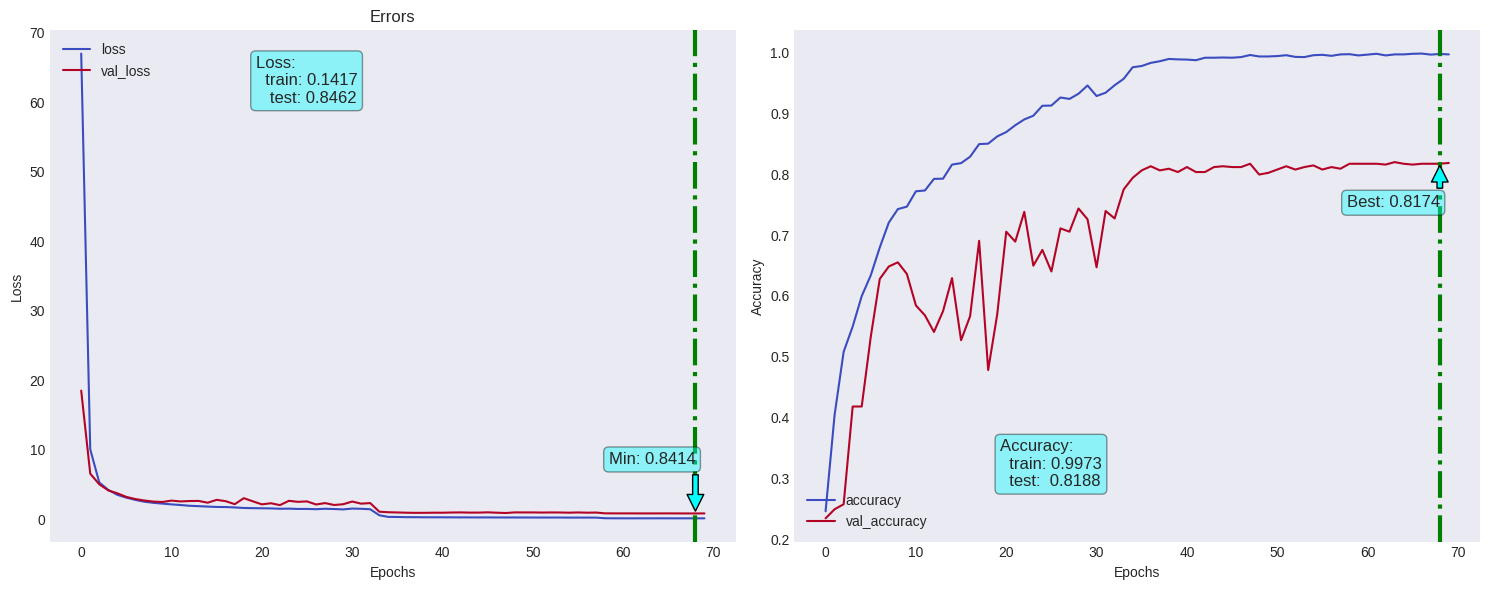

In [ ]:
fn_plot_tf_hist(pd.DataFrame(history.history))